In [1]:
from matminer.datasets.convenience_loaders import load_elastic_tensor
from matminer.featurizers.conversions import StrToComposition, CompositionToOxidComposition
from matminer.featurizers.composition import ElementProperty, OxidationStates
# from matminer.featurizers.structure import DensityFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d:\Visual Studio2019\env_for_ML_NP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import Data and Preprocessing 

In [2]:
df_pec_data = pd.read_excel('PCE1.xlsx', header = 1)
# df_pec_data = df_pec_data.sort_values(['Sample'], ignore_index = True)
col_labels = ['Element', 'Highest Ratio over Control', 'Average Ratio over Control', 'Concentration']
df_pec_data.columns = col_labels
df_pec_data.dropna(axis=0, how='all', inplace=True)
df_pec_data = df_pec_data.reset_index(drop=True)

#### Clean Duplicates and Keep Max Power Entries 

In [3]:
# row_i = 0
# formula_list = []
# for row_i in range(len(df_pec_data)):
#     formula = ''
#     for col_j in np.arange(1,8,1):
#         elm_frac = np.around(df_pec_data.iloc[row_i].values[col_j], 2)      #保留两位小数
#         if elm_frac > 0:
#             formula+=col_labels[col_j]+str(elm_frac)        
#     formula_list.append(formula)
df_pec_data['formula'] = df_pec_data['Element']   #为pd数据格式加了一列formula数据
df_pec_data 

,Element,Highest Ratio over Control,Average Ratio over Control,Concentration,formula
0,Ge,1.069344,0.993232,3.0,Ge
1,Ge,1.081592,1.036575,4.0,Ge
2,Ge,1.061692,1.018577,5.0,Ge
3,Ge,1.000000,1.000000,1.0,Ge
4,Sb,1.007063,0.943411,2.0,Sb
5,Sb,0.997502,0.938105,3.0,Sb
6,Sb,0.981142,0.967041,4.0,Sb
7,Sb,1.000000,1.000000,1.0,Sb
8,Al,1.083160,1.028891,4.0,Al
9,Al,1.084023,0.999546,5.0,Al


In [4]:
P_cal_form = 'Average Ratio over Control' #'Average Ratio over Control'
df_pec_data_sorted = df_pec_data.sort_values(by=['formula', P_cal_form],ascending = True) #升序排列

df_pec_data_sorted.head(-10)        #why not make it show last 10 row(X delete)

,Element,Highest Ratio over Control,Average Ratio over Control,Concentration,formula
9,Al,1.084023,0.999546,5.0,Al
10,Al,1.000000,1.000000,1.0,Al
8,Al,1.083160,1.028891,4.0,Al
30,Bi,0.823938,0.686521,3.0,Bi
32,Bi,0.812424,0.734150,5.0,Bi
31,Bi,0.944602,0.902404,4.0,Bi
33,Bi,1.000000,1.000000,1.0,Bi
16,Ga,0.926493,0.824472,5.0,Ga
15,Ga,0.944602,0.881485,4.0,Ga
17,Ga,1.000000,1.000000,1.0,Ga


In [5]:
# df_pec_data_cleaned = df_pec_data_sorted.drop_duplicates('formula', keep='last',ignore_index=True)  #pd格式下按相同的formula过滤，并只留下最后一个P最大的
df_pec_data_cleaned = df_pec_data_sorted        #不去除同组成的data

In [6]:
df_pec = StrToComposition().featurize_dataframe(df_pec_data_cleaned, "formula") #似乎是按前几列的colum label整理target col的数据，输出含有前几列的label，并作为新的col添加到pd中
df_pec.head(10)


StrToComposition: 100%|██████████| 34/34 [00:00<00:00, 106.37it/s]


,Element,Highest Ratio over Control,Average Ratio over Control,Concentration,formula,composition
9,Al,1.084023,0.999546,5.0,Al,(Al)
10,Al,1.000000,1.000000,1.0,Al,(Al)
8,Al,1.083160,1.028891,4.0,Al,(Al)
30,Bi,0.823938,0.686521,3.0,Bi,(Bi)
32,Bi,0.812424,0.734150,5.0,Bi,(Bi)
31,Bi,0.944602,0.902404,4.0,Bi,(Bi)
33,Bi,1.000000,1.000000,1.0,Bi,(Bi)
16,Ga,0.926493,0.824472,5.0,Ga,(Ga)
15,Ga,0.944602,0.881485,4.0,Ga,(Ga)
17,Ga,1.000000,1.000000,1.0,Ga,(Ga)


In [7]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_regression

In [8]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from scipy.stats import spearmanr, pearsonr

def y_inverse_transform(y_list):
    #y_orignal = np.exp(std_scalery.inverse_transform(y_list.reshape(-1,1)))
    #y_orignal = std_scalery.inverse_transform(y_list.reshape(-1,1))
    y_orignal = y_list.reshape(-1,1)
    return y_orignal 

def plt_true_vs_pred(y_true_list, y_pred_list, y_uncer_list, title_str_list, color_list,
                      only_value=False,
                      criterion='correlation'):
    fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
    fs = 20
    scores, cal_methods = [], []
    for i in np.arange(len(axes)):
        ## inverse transform
        y_true = y_true_list[i][:, -1]
        y_pred = y_pred_list[i][:, -1]
        y_uncer = np.sqrt(y_uncer_list[i][:,-1])

        if 'correlation' in criterion:
            spearman = spearmanr(y_true, y_pred) [0]
            pearson = pearsonr(y_true, y_pred) [0]
            scores.append([spearman, pearson])
            cal_methods.append(['sp_r', 'p_r'])
        elif'value' in criterion:
            rmse_value = np.sqrt(mse(y_true, y_pred))
            # mae_value = mae(y_true, y_pred)
            mape_value = mape(y_true, y_pred)
            scores.append([rmse_value, mape_value])
            cal_methods.append(['rmse', 'mape'])
        else:
            raise TypeError("Invalid input. OPT: 'correlation', 'value' ")

        if not only_value:
            lims1 = (0*0.9, 3*1.1)
            axes[i].scatter(y_true, y_pred, alpha = 0.3, c = color_list[i])
            axes[i].errorbar(y_true, y_pred, yerr = y_uncer, ms = 0,
                            ls = '', capsize = 2, alpha = 0.6,
                            color = 'gray', zorder = 0)
            axes[i].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)

            title = title_str_list[i] + " ({}={}, {}={})".format(cal_methods[i][0], np.round(scores[i][0],2),
                                                                 cal_methods[i][1], np.round(scores[i][1],2))
            axes[i].set_xlabel('Ground Truth', fontsize = fs)
            axes[i].set_ylabel('Prediction', fontsize = fs)
            axes[i].set_title(title, fontsize = fs)
            axes[i].set_xlim(0.5 , 1.5)
            axes[i].set_ylim(0.5 , 1.5)
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')

    if not only_value:
        plt.subplots_adjust(wspace = 0.35)
        plt.show()

    assert len(cal_methods) == len(scores)
    return cal_methods, scores



## Build regression model with composition descriptors (from `matminer`)

In [9]:
ep_feat = ElementProperty.from_preset(preset_name="magpie")
df_pec_magpie = ep_feat.featurize_dataframe(df_pec, col_id="composition")  #这两行是matminer的固定操作，用于加入描述符col
# input the "composition" column to the featurizer
df_pec_magpie.head(10)

ElementProperty: 100%|██████████| 34/34 [00:00<00:00, 66.90it/s]


,Element,Highest Ratio over Control,Average Ratio over Control,Concentration,formula,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
9,Al,1.084023,0.999546,5.0,Al,(Al),13.0,13.0,0.0,13.0,...,0.0,0.0,0.0,0.0,225.0,225.0,0.0,225.0,0.0,225.0
10,Al,1.000000,1.000000,1.0,Al,(Al),13.0,13.0,0.0,13.0,...,0.0,0.0,0.0,0.0,225.0,225.0,0.0,225.0,0.0,225.0
8,Al,1.083160,1.028891,4.0,Al,(Al),13.0,13.0,0.0,13.0,...,0.0,0.0,0.0,0.0,225.0,225.0,0.0,225.0,0.0,225.0
30,Bi,0.823938,0.686521,3.0,Bi,(Bi),83.0,83.0,0.0,83.0,...,0.0,0.0,0.0,0.0,12.0,12.0,0.0,12.0,0.0,12.0
32,Bi,0.812424,0.734150,5.0,Bi,(Bi),83.0,83.0,0.0,83.0,...,0.0,0.0,0.0,0.0,12.0,12.0,0.0,12.0,0.0,12.0
31,Bi,0.944602,0.902404,4.0,Bi,(Bi),83.0,83.0,0.0,83.0,...,0.0,0.0,0.0,0.0,12.0,12.0,0.0,12.0,0.0,12.0
33,Bi,1.000000,1.000000,1.0,Bi,(Bi),83.0,83.0,0.0,83.0,...,0.0,0.0,0.0,0.0,12.0,12.0,0.0,12.0,0.0,12.0
16,Ga,0.926493,0.824472,5.0,Ga,(Ga),31.0,31.0,0.0,31.0,...,0.0,0.0,0.0,0.0,64.0,64.0,0.0,64.0,0.0,64.0
15,Ga,0.944602,0.881485,4.0,Ga,(Ga),31.0,31.0,0.0,31.0,...,0.0,0.0,0.0,0.0,64.0,64.0,0.0,64.0,0.0,64.0
17,Ga,1.000000,1.000000,1.0,Ga,(Ga),31.0,31.0,0.0,31.0,...,0.0,0.0,0.0,0.0,64.0,64.0,0.0,64.0,0.0,64.0


In [10]:
_ = df_pec_magpie.shape[1] - 132           # changed param1 
use_concentration = True
# if use_concentration: 
desc = pd.concat([ df_pec_magpie['Concentration'], df_pec_magpie.iloc[:, _:] ], axis=1)

In [11]:
X_compo = desc.values  # all descriptors
# eval('P_cal_form')
y_pmax = df_pec_magpie[ P_cal_form ].values     #P（Eff max）
# y_pmax 
# X_compo.shape
# y_pmax.reshape(-1,1).shape

d:\Visual Studio2019\env_for_ML_NP\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


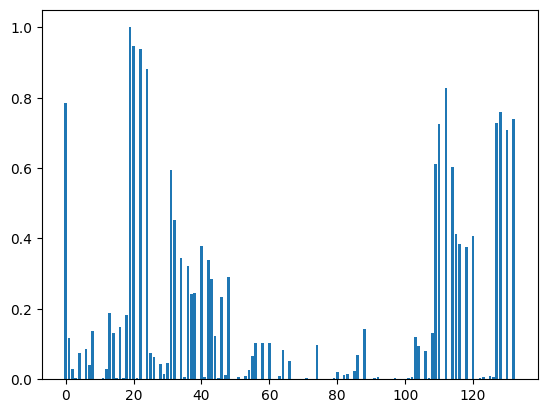

(34, 5)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

std_scalerX = MinMaxScaler()            #用于进行col数据的归一化（norm1）到[0,1]之间，是按列进行norm（将数据的每一个属性值减去其最小值，然后除以其极差）
std_scalery = StandardScaler()          #是一个用来对数据进行归一化和标准化的类norm2（利用var std等（那么在预测的时候， 也要对数据做同样的标准化处理，即也要用上面的scaler中的均值和方差来对预测时候的特征进行标准化

X = np.array(X_compo)
#X_log = np.log(X.astype('float'))   
y = np.array(y_pmax.reshape(-1,1))      

mi = mutual_info_regression(X, y)   #[616, 132] VS [616, 1]
mi /= np.max(mi)                    #还是norm3
plt.bar(np.arange(len(mi)), mi)     #mi 为132项， 画图是为了看mat desc中哪项对于Pmax的关联性最大
plt.show()

# hyperparam 2 :
thr = 0.2                                   #暂时不用mi去确定参与降维的维度的idx了？
# np.count_nonzero(mi>thr)        #32

from sklearn.decomposition import PCA       #mi用于过滤，使高维向量缩减到相关性强的维度上
# pca = PCA(n_components=20)                   ###n_components=20 must be between 0 and min(n samples,n features)=8
pca = PCA(n_components=0.9999)                  #使用：则会被降到5维
x_pca = pca.fit_transform(X)                    #PCA之前是否需要StandardScaler norm一下（和原论文中顺序不同）？
X_norm = std_scalerX.fit_transform(x_pca)       #重新对pca后的x进行归一化 norm4     

# y_log = np.log(y.astype('float'))   
#y_norm =  std_scalery.fit_transform(y)
X_norm.shape
# mi.shape                                      #plot显示似乎是 一个维度的相邻的维度 与Pmax的关系比较大
# print (pca.explained_variance_ratio_)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


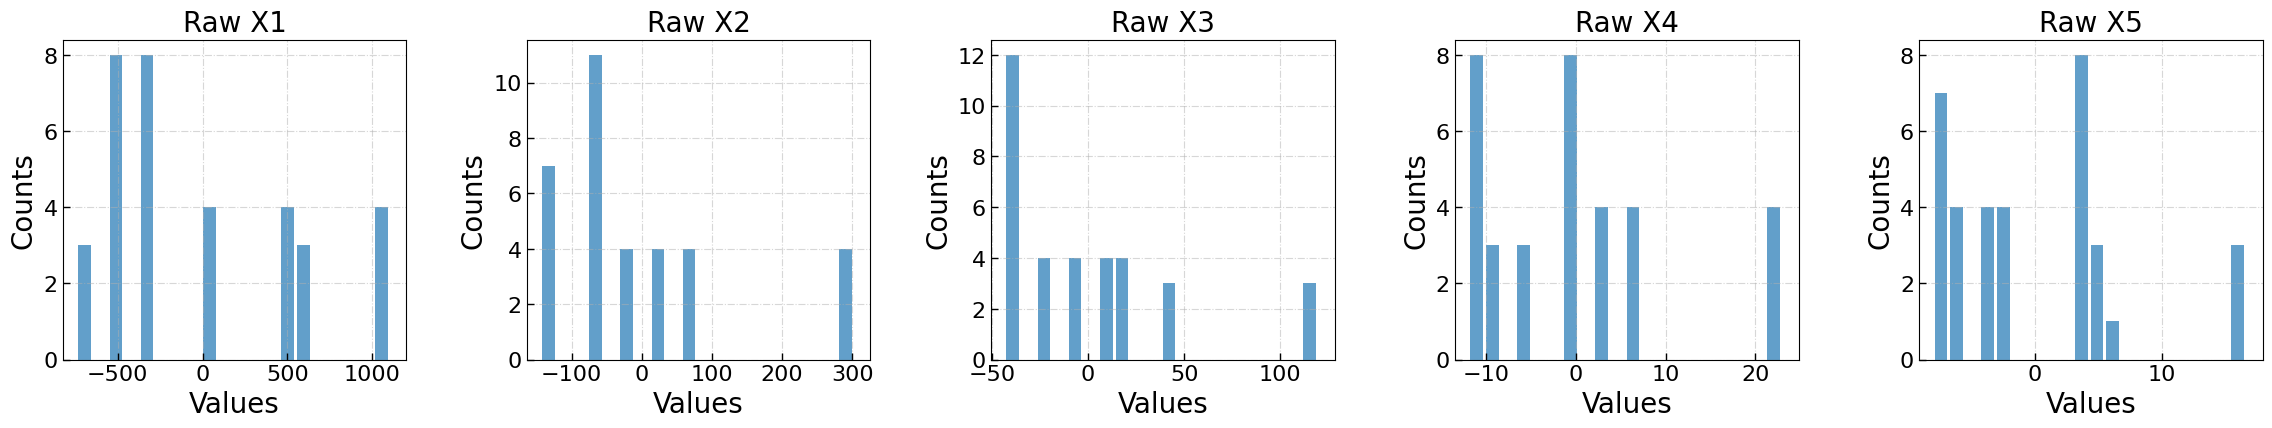

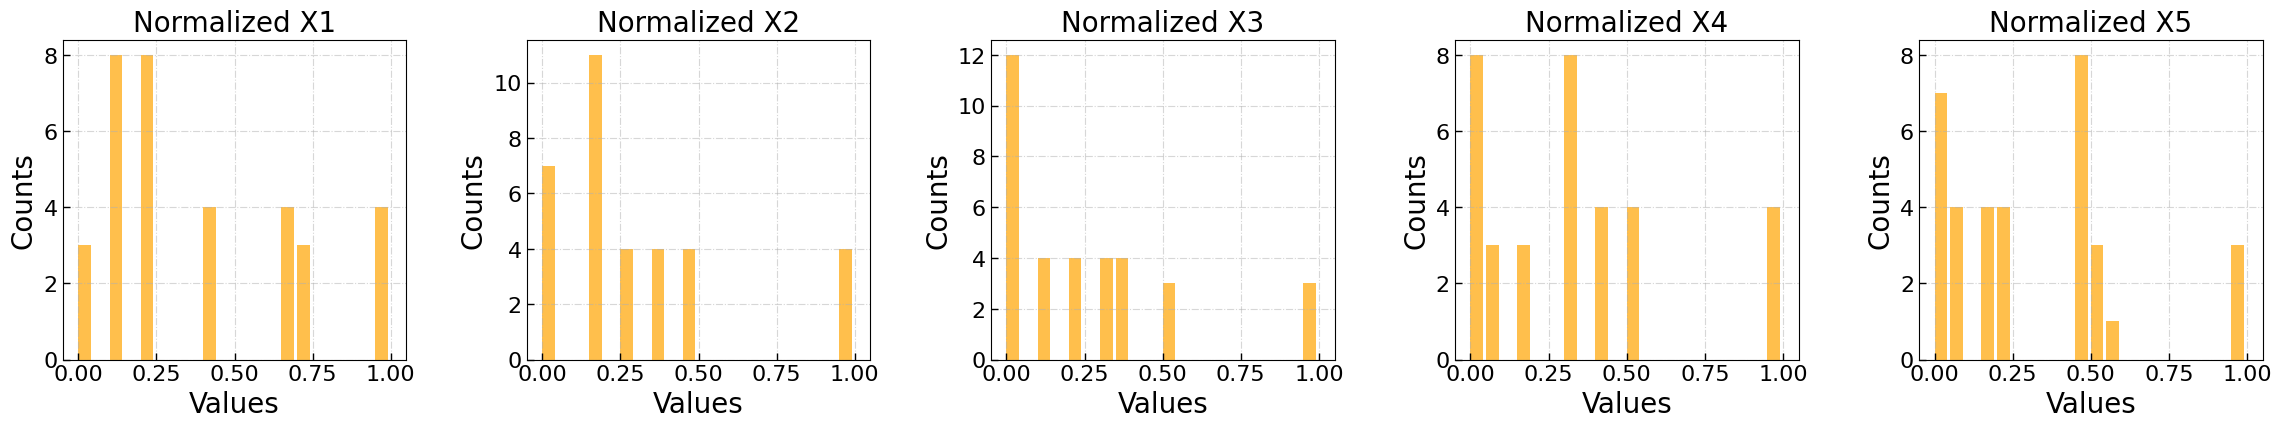

array([13., 13., 13., 83., 83., 83., 83., 31., 31., 31., 32., 32., 32.,
       32., 49., 49., 49., 49., 49., 49., 49., 49., 51., 51., 51., 51.,
       50., 50., 50., 50., 30., 30., 30., 30.])

In [13]:
import matplotlib.pyplot as plt
n_plots = 5
fs = 20
# set the font name for a font family
plt.rcParams.update({'font.sans-serif':'Helvetica'})
fig, axes = plt.subplots(1, n_plots, figsize=(5.5*n_plots, 4))

for i in np.arange(n_plots):
    axes[i].hist(np.array(x_pca[:,i]), bins =20,                                                #画hist是为了查看X某个维度(20个里面找一个）的数据分布情况
                 width = 0.04*(np.max(np.array(x_pca[:,i]))-np.min(np.array(x_pca[:,i]))),          #x_pca
                 alpha = 0.7)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Raw X'+str(i+1), fontsize = fs)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
plt.show()

fig, axes = plt.subplots(1, n_plots, figsize=(5.5*n_plots, 4))
fs = 20

for i in np.arange(n_plots):
    axes[i].hist(X_norm[:,i], bins =20, 
                 width = 0.04*(np.max(np.array(X_norm[:,i]))-np.min(np.array(X_norm[:,i]))),        #X_norm
                 alpha = 0.7, color = 'orange')
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Normalized X'+str(i+1), fontsize = fs)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
plt.show()      #注意hist count的总和为616
#这里图是空白应该是因为有些维度的数据都是0
X[:,2]  #X_norm[:,2]

In [14]:
np.random.seed(0)       #固定seed
num_elements = np.array([len(df_pec.composition[ci]) for ci in np.arange(len(df_pec))]) #提取616行中compsition元素的个数
sel_indx_1elem = (num_elements==1) 
sel_indx_2elem = (num_elements==2)      
sel_indx_3elem = (num_elements==3)
sel_indx_4elem = (num_elements==4)
# X_inp_list = [X_norm[sel_indx_2elem], X_norm[sel_indx_3elem], X_norm[sel_indx_4elem]]
X_inp_list = [X_norm[sel_indx_1elem]]
# y_outp_list = [y[sel_indx_2elem], y[sel_indx_3elem], y[sel_indx_4elem]]
y_outp_list = [y[sel_indx_1elem]]
# print(np.count_nonzero(sel_indx_1elem))
elem1_indx_random = [np.random.randint(len(X_norm[sel_indx_1elem])) for i in np.arange(np.count_nonzero(sel_indx_1elem))]   #用所有该集合的dp训练

## elem4_indx_random = [np.random.randint(len(X_norm[sel_indx_4elem])) for i in np.arange(20)]
## print('num of samples:', np.sum(sel_indx))

X_train, X_test, y_train, y_test = train_test_split(X_inp_list[0][elem1_indx_random],   #只对num_elements==3的数据进行训练(并且只用其中随机抽取的20个元素)
                                                    y_outp_list[0][elem1_indx_random],  #
                                                    test_size = 0.2)#, random_state=1)

In [15]:
print(X_train.shape, X_test.shape)  #[16, 20]  [4, 20]

(27, 5) (7, 5)


In [16]:
import GPy 
from GPy.models import GPRegression
## 
ker = GPy.kern.Matern52(input_dim = len(X_train[0]), ARD =True)     #Matern52有啥讲究吗？
ker.lengthscale.constrain_bounded(1e-2, 25)         #超参数？（好像是posterior 得到的）
ker.variance.constrain_bounded(1e-2, 100.0)

gpy_regr = GPRegression(X_train, y_train, ker)#
#gpy_regr.Gaussian_noise.variance = (0.01)**2       #这个一般需要怎么调整呢？（好像是posterior 得到的）
#gpy_regr.Gaussian_noise.variance.fix()

gpy_regr.randomize()
gpy_regr.optimize_restarts(num_restarts=20, verbose =True, messages=False)

# display(gpy_regr)
# GPy.plotting.show(m.plot(), filename='RBF_001')


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


Optimization restart 1/20, f = -16.760003821957334
Optimization restart 2/20, f = -16.757559172481667
Optimization restart 3/20, f = -16.76000382984371
Optimization restart 4/20, f = -16.76000351962285
Optimization restart 5/20, f = -16.760003828774657
Optimization restart 6/20, f = -16.760003797624595
Optimization restart 7/20, f = -16.75755921592041
Optimization restart 8/20, f = -16.757559154797054
Optimization restart 9/20, f = -16.760003823039206
Optimization restart 10/20, f = -16.760003811647266
Optimization restart 11/20, f = -16.76000367336527
Optimization restart 12/20, f = -16.760003801230333
Optimization restart 13/20, f = -16.760003708523584
Optimization restart 14/20, f = -16.757558952992646
Optimization restart 15/20, f = -16.760003608189784
Optimization restart 16/20, f = -16.760003773672093
Optimization restart 17/20, f = -16.76000353986505
Optimization restart 18/20, f = -16.760003815003024
Optimization restart 19/20, f = -16.760003736235774
Optimization restart 20/20

In [ ]:
print(ker.lengthscale, '/n')
print(ker.variance, '/n')
print(gpy_regr.Gaussian_noise)

y_pred_train, y_uncer_train= gpy_regr.predict(X_train)
y_pred_test, y_uncer_test = gpy_regr.predict(X_test)

In [ ]:

plt_true_vs_pred([y_train, y_test],
                 [y_pred_train, y_pred_test],[y_uncer_train, y_uncer_test],
                 ['Mat52-Train','Mat52-Test'],
                 ['blue', 'darkorange'], criterion='correlation') 
# cal_method, scores = plt_true_vs_pred([y_train_fold, y_test_fold], 
#                  [y_pred_train, y_pred_test],[y_uncer_train, y_uncer_test],
#                  ['GP-Mat52 - Train','GP-Mat52 - Test'],
#                  ['blue', 'darkorange'], only_value=True, criterion='correlation') 

In [ ]:
from sklearn.model_selection import KFold
import GPy 
from GPy.models import GPRegression

# when use K fold not use train_test split: 
X_train = X_norm; y_train = y[:, -1]
# 创建一个用于得到不同训练集和测试集样本的索引的StratifiedKFold实例，折数为5
strtfdKFold = KFold(n_splits=5)
#把特征和标签传递给StratifiedKFold实例
kfold = strtfdKFold.split(X_train, y_train)
#循环迭代，（K-1）份用于训练，1份用于验证，把每次模型的性能记录下来。
scores_train, scores_test = [], []
uncer_train, uncer_test = [], []

for k, (train, test) in enumerate(kfold):
    X_train_fold, y_train_fold = X_train[train], y_train[train]
    X_test_fold, y_test_fold = X_train[test], y_train[test]

    ker = GPy.kern.Matern52(input_dim = len(X_train_fold[0]), ARD =True)     #Matern52有啥讲究吗？
    ker.lengthscale.constrain_bounded(1e-2, 25)         #超参数？（好像是posterior 得到的）
    ker.variance.constrain_bounded(1e-2, 100.0)

    gpy_regr = GPRegression(X_train_fold, y_train_fold.reshape(-1,1), ker)#
    #gpy_regr.Gaussian_noise.variance = (0.01)**2       #这个一般需要怎么调整呢？（好像是posterior 得到的）
    #gpy_regr.Gaussian_noise.variance.fix()

    y_pred_train, y_uncer_train = gpy_regr.predict(X_train_fold)
    y_pred_test, y_uncer_test = gpy_regr.predict(X_test_fold)

    y_pred_train, y_uncer_train = y_pred_train[:,-1], y_uncer_train[:,-1]
    y_pred_test, y_uncer_test = y_pred_test[:,-1], y_uncer_test[:,-1]

    gpy_regr.randomize()
    gpy_regr.optimize_restarts(num_restarts=5, verbose=False, messages=False)
    
    score_train = pearsonr(y_train_fold, y_pred_train) [0]; scores_train.append(score_train)
    score_test = pearsonr(y_test_fold, y_pred_test) [0]; scores_test.append(score_test)
    # train_score = spearmanr(y_train_fold, y_pred_train) [0]
    uncer_train.append(y_uncer_train.mean())
    uncer_test.append(y_uncer_test.mean())

# plot_CrossVal_avg(uncer_train, uncer_test)
# plot_CrossVal_avg(scores_train, scores_test)
print('\n\nTRAIN: Cross-Validation score: %.3f +/- %.3f' %(np.array(scores_train).mean(), 
                                                            np.array(scores_train).std()))
print('\n\nTEST: Cross-Validation score: %.3f +/- %.3f' %(np.array(scores_test).mean(), 
                                                            np.array(scores_test).std()))
print('\n\nTRAIN: Cross-Validation uncertainty: %.3f +/- %.3f' %(np.array(uncer_train).mean(), 
                                                            np.array(uncer_train).std()))
print('\n\nTEST: Cross-Validation uncertainty: %.3f +/- %.3f' %(np.array(uncer_test).mean(),
                                                            np.array(uncer_test).std()))

In [ ]:
X_val = X_inp_list[2]## 4 Element Dataset
y_val = y_outp_list[2]## 4 Element Dateset

In [ ]:
y_pred_val, y_uncer_val = gpy_regr.predict(X_val)
plt_true_vs_pred([y_test, y_val], 
                 [y_pred_test, y_pred_val], [y_uncer_test, y_uncer_val],
                 ['GP-Mat52 - Test','GP-Mat52 - Valid'],
                 ['darkorange', 'darkred'])

In [ ]:
plt.rcParams.update({'font.sans-serif':'Helvetica'})
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(3.5*n_plots, 3))
y_hist = [y_test, y_val]                                  ####这里是做了一个对比图：为了查看验证集和测试集中pred和ground truth数值的分布情况
color = ['orange', 'red']
hist_labels = ['test GT', 'validation GT']
for i in np.arange(n_plots):
    axes[i].hist(np.array(y_hist[i]), bins =20, 
                 width = 0.04*(np.max(np.array(y_hist[i]))-np.min(np.array(y_hist[i]))), 
                 alpha = 0.7, color = color[i])
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title(hist_labels[i], fontsize = fs)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
plt.show()

plt.rcParams.update({'font.sans-serif':'Helvetica'})
n_plots = 2
fig, axes = plt.subplots(1, n_plots, figsize=(3.5*n_plots, 3))
y_hist = [y_pred_test, y_pred_val]
color = ['darkorange', 'darkred']
hist_labels = ['test pred', 'validation pred']
for i in np.arange(n_plots):
    axes[i].hist(np.array(y_hist[i]), bins =20, 
                 width = 0.04*(np.max(np.array(y_hist[i]))-np.min(np.array(y_hist[i]))), 
                 alpha = 0.7, color = color[i])
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title(hist_labels[i], fontsize = fs)
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.35, 
                    hspace=0.35)
plt.show()

In [ ]:
# elem4_indx_random = [np.random.randint(len(X_val)) for i in np.arange(10)]
# X_val_init = X_val[elem4_indx_random]
# y_val_init = y_val[elem4_indx_random]
# X_init = np.concatenate([X_train, X_test, X_val_init])      #从elem4中挑选一部分（10个）数据参与model训练
# y_init = np.concatenate([y_train, y_test, y_val_init])
# X_remain = np.delete(X_val,elem4_indx_random, 0)
# y_remain = np.delete(y_val,elem4_indx_random, 0)
# len(y_remain)

# for it in np.arange(20):
#     print("highest power so far: ", np.max(y_init))

#     ker = GPy.kern.Matern52(input_dim = len(X_init[0]), ARD =True)#
#     ker.lengthscale.constrain_bounded(1e-2, 10)
#     ker.variance.constrain_bounded(1e-2, 100.0)

#     gpy_regr = GPRegression(X_init, y_init, ker)#
#     #gpy_regr.Gaussian_noise.variance = (0.01)**2
#     #gpy_regr.Gaussian_noise.variance.fix()
#     gpy_regr.randomize()
#     gpy_regr.optimize_restarts(num_restarts=3,verbose =True, messages=False)
#     print(ker.lengthscale)
#     print(ker.variance)
#     print(gpy_regr.Gaussian_noise)


#     y_pred_init, y_uncer_init= gpy_regr.predict(X_init)
#     y_pred_remain, y_uncer_remain = gpy_regr.predict(X_remain)          #测试剩余的elem4元素的预测情况
#     plt_true_vs_pred([y_init, y_remain], 
#                      [y_pred_init, y_pred_remain], [y_uncer_init, y_uncer_remain],
#                      ['GP-Mat52 - Init','GP-Mat52 - Remain'],
#                      ['darkorange', 'darkred'])
#     ucb = np.sqrt(y_uncer_remain)+y_pred_remain             ##[468, 1]
#     top_ucb_indx = np.argsort(ucb[:,-1])[-10:]              #np.argsort处理一维数组，返回从小到大的索引(这里选取P最大的10个dp)  
#     X_new = X_remain[top_ucb_indx]                           #ucb[:,-1]相当于一种特殊的reshape，可以将[3,1]变为[3,]
#     y_new = y_remain[top_ucb_indx]

#     X_init = np.concatenate([X_init, X_new])
#     y_init = np.concatenate([y_init, y_new])
#     X_remain = np.delete(X_remain,top_ucb_indx, 0)
#     y_remain = np.delete(y_remain,top_ucb_indx, 0)


In [ ]:
# fig, axes = plt.subplots(1, 1, figsize=(5.5*1.5, 4.5), sharey = False)
# fs = 20
# ax = axes
# ax.plot(np.arange(len(y_init))-len(np.concatenate([X_train, X_test])),    #含义为：当前使用的dp个数（包括elem4）减去所使用的elem3一共的数据个数
#         np.maximum.accumulate(y_init), c = 'green', label = 'MM - ElemDescriptor')
# ax.scatter(np.arange(len(y_init))-len(np.concatenate([X_train, X_test])),y_init, c = 'green',alpha = 0.2)

# ax.plot(np.zeros(10),np.arange(10)/2-1, '--',c = 'black')
# ax.set_ylabel('Current Best Efficiency', fontsize = 20)
# ax.set_xlabel('Materials Composition', fontsize = 20)

# ax.set_ylim(0.2, 3.5)
# #axes[0].set_xlim(-1, 105)
# #axes[0].set_xticks(np.arange(0,105,10))
# ax.legend(fontsize = fs*0.7)
# ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
# ax.grid(True, linestyle='-.')

# plt.show()                      #这图似乎是预测出的最大的P 和加入model训练的dp数量的关系图

In [ ]:
y_list_descr = []                                   #此cell为重复之前的思路的总结版
for rep in np.arange(10):                                      #10次cycle，这里相当于repeat 10次
    elem4_indx_random = [np.random.randint(len(X_val)) for i in np.arange(10)]
    X_val_init = X_val[elem4_indx_random]
    y_val_init = y_val[elem4_indx_random]                   
    X_init = np.concatenate([X_train, X_test, X_val_init])          #这里的X_init训练集包括所有的elem3以及5个elem4 dp
    y_init = np.concatenate([y_train, y_test, y_val_init])
    X_remain = np.delete(X_val,elem4_indx_random, 0)
    y_remain = np.delete(y_val,elem4_indx_random, 0) 
    for it in np.arange(20):                                        #每次cycle中进行20次迭代（最终训练集size = init_X_size + 20*10)
        print("highest power so far: ", np.max(y_init))             #源码中似乎是每次进行一次X_init的更新后进行一次pca（每个batch后）

        ker = GPy.kern.Matern52(input_dim = len(X_init[0]), ARD =True)#
        ker.lengthscale.constrain_bounded(1e-2, 10) 
        ker.variance.constrain_bounded(1e-2, 100.0)

        gpy_regr = GPRegression(X_init, y_init, ker)#
        #gpy_regr.Gaussian_noise.variance = (0.01)**2
        #gpy_regr.Gaussian_noise.variance.fix()
        gpy_regr.randomize()
        gpy_regr.optimize_restarts(num_restarts=3,verbose =True, messages=False)
        print(ker.lengthscale)
        print(ker.variance)
        print(gpy_regr.Gaussian_noise)


        y_pred_init, y_uncer_init= gpy_regr.predict(X_init)
        y_pred_remain, y_uncer_remain = gpy_regr.predict(X_remain)
        plt_true_vs_pred([y_init, y_remain], 
                         [y_pred_init, y_pred_remain], [y_uncer_init, y_uncer_remain],
                         ['GP-Mat52 - Init','GP-Mat52 - Remain'],
                         ['darkorange', 'darkred'])
        ucb = np.sqrt(y_uncer_remain)+y_pred_remain         #对计算标准有一点疑问？+ 最终model的预测准确度不做评判吗？+还是只能输入一组特定材料输出Pmax？
        top_ucb_indx = np.argsort(ucb[:,-1])[-10:]
        X_new = X_remain[top_ucb_indx]        #加入训练集的的是每次预测X_remain中的P最大的前10个（相当于选择性的将测试集中的数据加入训练）
        y_new = y_remain[top_ucb_indx]
        '''抽样策略的评价标准很重要'''

        X_init = np.concatenate([X_init, X_new])
        y_init = np.concatenate([y_init, y_new])
        X_remain = np.delete(X_remain,top_ucb_indx, 0)
        y_remain = np.delete(y_remain,top_ucb_indx, 0)
        print(len(X_init))
    y_list_descr.append(y_init)                     #记录repeat 10次中每次repeat的最后参与训练的的数据集

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5.5*1.5, 4.5), sharey = False)
fs = 20
ax = axes
ymax_acc_list = []
for i in np.arange(len(y_list_descr)):
    ymax_acc = np.maximum.accumulate(y_list_descr[i])
    ax.plot(np.arange(len(y_list_descr[i]))-len(np.concatenate([X_train, X_test])),     #画max线。len(y_list_descr[i])应该是相同的
            ymax_acc, c = 'green', alpha = 0.3)
    ymax_acc_list.append(ymax_acc)
ax.plot(np.arange(len(y_list_descr[0]))-len(np.concatenate([X_train, X_test])),
        np.mean(ymax_acc_list, axis = 0), '--', c = 'blue', alpha = 0.8)                 #repeat的10次的mean Pmax值
#ax.scatter(np.arange(len(y_init))-len(np.concatenate([X_train, X_test])),y_init, c = 'green',alpha = 0.2)

ax.plot(np.zeros(10),np.arange(10)/2-1, '--',c = 'black')
ax.set_ylabel('Current Best Efficiency', fontsize = 20)
ax.set_xlabel('Materials Composition', fontsize = 20)

ax.set_ylim(0.2, 3.5)
#axes[0].set_xlim(-1, 105)
#axes[0].set_xticks(np.arange(0,105,10))
ax.legend(fontsize = fs*0.7)
ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')

plt.show()